In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df=pd.read_csv("IPL 2022.csv")

In [3]:
df

match_id           date                                         venue  \
0          1  March 26,2022                      Wankhede Stadium, Mumbai   
1          2  March 27,2022                     Brabourne Stadium, Mumbai   
2          3  March 27,2022            Dr DY Patil Sports Academy, Mumbai   
3          4  March 28,2022                      Wankhede Stadium, Mumbai   
4          5  March 29,2022  Maharashtra Cricket Association Stadium,Pune   
..       ...            ...                                           ...   
69        70    May 22,2022                      Wankhede Stadium, Mumbai   
70        71    May 24,2022                         Eden Gardens, Kolkata   
71        72    May 25,2022                         Eden Gardens, Kolkata   
72        73    May 27,2022              Narendra Modi Stadium, Ahmedabad   
73        74    May 29,2022              Narendra Modi Stadium, Ahmedabad   

        team1      team2    stage toss_winner toss_decision  first_ings_score  \
0     Chennai    Kolkata    Group     Kolkata         Field               131   
1       Delhi     Mumbai    Group       Delhi         Field               177   
2    Banglore     Punjab    Group      Punjab         Field               205   
3     Gujarat    Lucknow    Group     Gujarat         Field               158   
4   Hyderabad  Rajasthan    Group   Hyderabad         Field               210   
..        ...        ...      ...         ...           ...               ...   
69  Hyderabad     Punjab    Group   Hyderabad           Bat               157   
70    Gujarat  Rajasthan  Playoff     Gujarat         Field               188   
71   Banglore    Lucknow  Playoff     Lucknow         Field               207   
72   Banglore  Rajasthan  Playoff   Rajasthan         Field               157   
73    Gujarat  Rajasthan    Final   Rajasthan           Bat               130   

    first_ings_wkts  second_ings_score  second_ings_wkts match_winner  \
0                 5                133                 4      Kolkata   
1                 5                179                 6        Delhi   
2                 2                208                 5       Punjab   
3                 6                161                 5      Gujarat   
4                 6                149                 7    Rajasthan   
..              ...                ...               ...          ...   
69                8                160                 5       Punjab   
70                6                191                 3      Gujarat   
71                4                193                 6     Banglore   
72                8                161                 3    Rajasthan   
73                9                133                 3      Gujarat   

     won_by  margin player_of_the_match        top_scorer  highscore  \
0   Wickets       6         Umesh Yadav          MS Dhoni         50   
1   Wickets       4       Kuldeep Yadav      Ishan Kishan         81   
2   Wickets       5         Odean Smith    Faf du Plessis         88   
3   Wickets       5      Mohammed Shami      Deepak Hooda         55   
4      Runs      61        Sanju Samson     Aiden Markram         57   
..      ...     ...                 ...               ...        ...   
69  Wickets       5       Harpreet Brar  Liam Livingstone         49   
70  Wickets       7        David Miller       Jos Buttler         89   
71     Runs      14       Rajat Patidar     Rajat Patidar        112   
72  Wickets       7         Jos Buttler       Jos Buttler        106   
73  Wickets       7       Hardik Pandya      Shubman Gill         45   

        best_bowling best_bowling_figure  
0       Dwayne Bravo               3--20  
1      Kuldeep Yadav               3--18  
2     Mohammed Siraj               2--59  
3     Mohammed Shami               3--25  
4   Yuzvendra Chahal               3--22  
..               ...                 ...  
69     Harpreet Brar               3--26  
70     Hardik Pandya

In [4]:
pip install bar_chart_race

In [5]:
pip install ffmpeg-python

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import bar_chart_race as bcr

In [7]:
# Convert the date column to datetime format with a custom parser
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%B %d,%Y')

In [8]:
# Group by date and team1, then calculate the sum of scores for team1
team1_scores = df.groupby(['date', 'team1'])['first_ings_score'].sum().reset_index()
# Rename the columns in the Team 1 Scores DataFrame
team1_scores = team1_scores.rename(columns={'date': 'date', 'team1': 'team', 'first_ings_score': 'score'})

# Display the results for Team 1 Scores
print("Team 1 Scores:")
print(team1_scores)
# Group by date and team2, then calculate the sum of scores for team2
team2_scores = df.groupby(['date', 'team2'])['second_ings_score'].sum().reset_index()

# Rename the columns in the Team 1 Scores DataFrame
team2_scores = team2_scores.rename(columns={'date': 'date', 'team2': 'team', 'second_ings_score': 'score'})

# Display the results for Team 1 Scores
print("Team 2 Scores:")
print(team2_scores)

Team 1 Scores:
         date       team  score
0  2022-03-26    Chennai    131
1  2022-03-27   Banglore    205
2  2022-03-27      Delhi    177
3  2022-03-28    Gujarat    158
4  2022-03-29  Hyderabad    210
..        ...        ...    ...
68 2022-05-22  Hyderabad    157
69 2022-05-24    Gujarat    188
70 2022-05-25   Banglore    207
71 2022-05-27   Banglore    157
72 2022-05-29    Gujarat    130

[73 rows x 3 columns]
Team 2 Scores:
         date       team  score
0  2022-03-26    Kolkata    133
1  2022-03-27     Mumbai    179
2  2022-03-27     Punjab    208
3  2022-03-28    Lucknow    161
4  2022-03-29  Rajasthan    149
..        ...        ...    ...
68 2022-05-22     Punjab    160
69 2022-05-24  Rajasthan    191
70 2022-05-25    Lucknow    193
71 2022-05-27  Rajasthan    161
72 2022-05-29  Rajasthan    133

[73 rows x 3 columns]


In [9]:
# Assuming team1_scores and team2_scores are your DataFrames for Team 1 and Team 2 scores

# Merge the two DataFrames on the 'date' and 'team' columns
merged_scores = pd.merge(team1_scores, team2_scores, how='outer', on=['date', 'team'])

# Fill NaN values with 0 for the score columns
merged_scores['score_x'] = merged_scores['score_x'].fillna(0)
merged_scores['score_y'] = merged_scores['score_y'].fillna(0)

# Combine the score columns into a single column
merged_scores['score'] = merged_scores['score_x'] + merged_scores['score_y']

# Drop the individual score columns
merged_scores = merged_scores.drop(['score_x', 'score_y'], axis=1)

# Sort the DataFrame by date
merged_scores = merged_scores.sort_values(by='date')

# Reset the index
merged_scores = merged_scores.reset_index(drop=True)

# Display the merged DataFrame
print("Merged Scores:")
print(merged_scores)

Merged Scores:
          date       team  score
0   2022-03-26    Chennai  131.0
1   2022-03-26    Kolkata  133.0
2   2022-03-27   Banglore  205.0
3   2022-03-27      Delhi  177.0
4   2022-03-27     Mumbai  179.0
..         ...        ...    ...
141 2022-05-25   Banglore  207.0
142 2022-05-27  Rajasthan  161.0
143 2022-05-27   Banglore  157.0
144 2022-05-29    Gujarat  130.0
145 2022-05-29  Rajasthan  133.0

[146 rows x 3 columns]


In [10]:
# Create a pivot table with date in rows and teams in columns
pivot_table = pd.pivot_table(merged_scores, values='score', index='date', columns='team', aggfunc='sum', fill_value=0)

# Calculate cumulative values date-wise
cumulative_table = pivot_table.cumsum()

# Display the pivot table with cumulative values
print("Pivot Table with Cumulative Values:")
cumulative_table

Pivot Table with Cumulative Values:


team        Banglore  Chennai  Delhi  Gujarat  Hyderabad  Kolkata  Lucknow  \
date                                                                         
2022-03-26         0      131      0        0          0      133        0   
2022-03-27       205      131    177        0          0      133        0   
2022-03-28       205      131    177      158          0      133      161   
2022-03-29       205      131    177      158        210      133      161   
2022-03-30       333      131    177      158        210      265      161   
...              ...      ...    ...      ...        ...      ...      ...   
2022-05-22      2363     2329   2365     2100       2158     2251     2352   
2022-05-24      2363     2329   2365     2288       2158     2251     2352   
2022-05-25      2570     2329   2365     2288       2158     2251     2545   
2022-05-27      2727     2329   2365     2288       2158     2251     2545   
2022-05-29      2727     2329   2365     2418       2158     2251     2545   

team        Mumbai  Punjab  Rajasthan  
date                                   
2022-03-26       0       0          0  
2022-03-27     179     208          0  
2022-03-28     179     208          0  
2022-03-29     179     208        149  
2022-03-30     179     208        149  
...            ...     ...        ...  
2022-05-22    2249    2222       2316  
2022-05-24    2249    2222       2507  
2022-05-25    2249    2222       2507  
2022-05-27    2249    2222       2668  
2022-05-29    2249    2222       2801  

[61 rows x 10 columns]

In [18]:

# Create the bar chart race
bcr.bar_chart_race(
    df= cumulative_table,
    n_bars=30, period_length=1200,
    filename=None,
    figsize=(4, 3),
    title="Ipl team scores",
)

C:\Users\hp\anaconda3\Lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\hp\anaconda3\Lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator



In [ ]:
# Objectives
#The objective of this plot is to create an animated bar chart race that showcases the changing rankings or scores of the top 30 IPL teams over consecutive time periods.
#This dynamic visualization helps in understanding the relative performance and fluctuations in scores among the selected teams throughout the specified time frame.

#Interpretation
#The bar chart race focuses on the top IPL teams based on some criteria (cumulative scores). 
#These teams are dynamically ranked and visualized over time, providing a clear perspective on the performance of the leading teams.
#Each bar in the chart represents an IPL team, and the height of the bar corresponds to the cumulative score of that team.
#The chart tells us that the team with highest total cummulative score is Rajasthan with 2801 total score.
#As the animation progresses through different time periods, viewers can observe how the cumulative scores evolve, showcasing trends, spikes, and dips in team performance.
#By visualizing multiple teams simultaneously, the chart enables a comparative analysis of their cumulative scores. 
#We can identify which teams consistently maintain high scores, which ones experience fluctuations, and how the rankings shift over time.

#Managerial Implications
#The animated bar chart race, focusing on the cumulative scores of top IPL teams, offers valuable managerial insights for team management.
#It serves as a benchmarking tool, allowing teams to set performance goals based on the exemplary performance of leading teams like Rajasthan.
#Strategic decision-making is enhanced through the visualization of performance trends over time, enabling management to identify areas for improvement and implement targeted strategies. 
#The comparative analysis of multiple teams facilitates competitive assessments, guiding teams in staying ahead in the dynamic IPL landscape. Recognizing consistent high performers becomes pivotal, as management can study their strategies for sustained success. 

In [11]:
figure = px.bar(df, x= df['match_winner'], title="number of matches wob by each team in ipl 2022")
figure.show()

In [ ]:
#Objectives
#The objective of this plot is to offer a clear and visual representation of the performance of each IPL team in terms of the number of matches won during the IPL 2022 season. 
#The bar chart allows for easy comparison, and we can quickly identify which teams had a higher number of victories. 
#This type of visualization is valuable for assessing team success and dominance in the tournament.


#Interpretation
#Each bar in the chart corresponds to a specific IPL team, and the x-axis represents the teams participating in the IPL 2022.
#The height of each vertical bar indicates the number of matches won by the respective team. 
#Taller bars represent teams with a higher count of victories, while shorter bars signify fewer wins.
#The chart shows that Gujarat won the highest number of matches i.e. 12 and the least number of matches won by team Chennai and Mumbai with 4 matches.
#The chart allows for a quick and visual comparison of the number of matches won by different teams. 
#We can easily identify which teams have been more successful in securing victories throughout the IPL 2022 season.

#Manegarial Implication
#The bar chart provides a straightforward and visually intuitive representation of the performance of IPL teams in the 2022 season.
#Notably, Gujarat stands out as the top-performing team with 12 victories, while Chennai and Mumbai lag behind with the least number of wins at 4 matches each. 
#This visual comparison offers a clear snapshot of team performance, allowing viewers to quickly identify which teams have excelled and which ones have faced challenges in securing victories throughout the IPL 2022 season.

In [12]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Calculate the total wickets for each team after each match
df['total_wickets_team1'] = df.groupby('team1')['second_ings_wkts'].cumsum()
df['total_wickets_team2'] = df.groupby('team2')['first_ings_wkts'].cumsum()

# Concatenate data for both teams for plotting
total_wickets_data = pd.concat([df[['date', 'team1', 'total_wickets_team1']].rename(columns={'team1': 'team', 'total_wickets_team1': 'total_wickets'}),
                                df[['date', 'team2', 'total_wickets_team2']].rename(columns={'team2': 'team', 'total_wickets_team2': 'total_wickets'})])

# Sort DataFrame by date
total_wickets_data = total_wickets_data.sort_values(by='date')

# Create a new column representing the order of dates
total_wickets_data['date_order'] = range(1, len(total_wickets_data) + 1)

# Create an animated horizontal bar chart
fig = px.bar(total_wickets_data, x='total_wickets', y='team', color='team',
             title='Total Wickets of Teams Over Time',
             labels={'total_wickets': 'Total Wickets', 'team': 'Team'},
             animation_frame='date_order',
             animation_group='team',
             range_x=[0, total_wickets_data['total_wickets'].max() + 5],  # Adjust the range based on your data
             orientation='h')

# Update layout for better readability
fig.update_layout(yaxis=dict(categoryorder='total ascending'))

# Show the animated plot
fig.show()


In [ ]:
#Objectives
#The objective of this plot is to visually convey the bowling performance of different IPL teams by illustrating the accumulation of wickets over the course of the IPL 2022 matches. 
#Managers, analysts, or enthusiasts can use this visualization to track teams' bowling strengths, identify trends, and assess the consistency of wicket-taking performances throughout the tournament.

#Interpretation
#The chart effectively visualizes the cumulative total wickets for both teams after each match throughout the specified timeframe. 
#Each team is represented by a distinct color, and the length of the horizontal bars corresponds to the total wickets taken.
#The y-axis displays the teams, and the x-axis shows the cumulative total wickets. 
#As the animation progresses, viewers can observe the dynamic changes in the total wickets for each team after every match, offering insights into their bowling performance over the course of the tournament.
#We can see the total wickets taken after each match of every team.

#Managerail Implications
#The animated horizontal bar chart effectively illustrates the cumulative total wickets taken by each IPL team after every match, providing valuable managerial insights.
#Teams with consistently high bars indicate a strong and reliable bowling performance, showcasing their ability to take wickets consistently throughout the tournament. Managers can identify trends, spikes, or declines in wicket-taking performance, enabling strategic decisions related to team composition, bowling strategies, and player rotations.
#For teams experiencing fluctuations or a downward trend in cumulative wickets, there may be opportunities for managerial interventions such as targeted training, tactical adjustments, or potential changes in the bowling lineup. 
#This visual representation aids managers in assessing the effectiveness of their bowling units over time, facilitating data-driven decisions to enhance overall team performance.

In [13]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], format='%B %d,%Y', errors='coerce')

# Calculate the cumulative total runs for each team after each match
df['cumulative_runs_team1'] = df.groupby('team1')['second_ings_score'].cumsum()
df['cumulative_runs_team2'] = df.groupby('team2')['first_ings_score'].cumsum()

# Concatenate data for both teams for plotting
area_chart_data = pd.concat([df[['date', 'team1', 'cumulative_runs_team1']].rename(columns={'team1': 'team', 'cumulative_runs_team1': 'cumulative_runs'}),
                             df[['date', 'team2', 'cumulative_runs_team2']].rename(columns={'team2': 'team', 'cumulative_runs_team2': 'cumulative_runs'})])

# Sort DataFrame by date
area_chart_data = area_chart_data.sort_values(by='date')

# Create an animated area chart
fig = px.area(area_chart_data, x='date', y='cumulative_runs', color='team',
              title='Animated Area Chart of Cumulative Total Runs Over Time',
              labels={'cumulative_runs': 'Cumulative Total Runs', 'team': 'Team'},
              animation_frame=area_chart_data.groupby('team').cumcount(),
              range_y=[0, area_chart_data['cumulative_runs'].max() + 50])

# Update layout for better readability
fig.update_layout(yaxis=dict(categoryorder='total ascending'))

# Show the animated plot
fig.show()


In [ ]:
#Objectives
#The objective of this plot is to visually convey the batting performance of different IPL teams by illustrating the accumulation of runs over the course of the IPL 2022 matches. 
#Managers, analysts, or enthusiasts can use this visualization to track teams' batting strengths, identify trends, and assess the consistency of high-scoring performances throughout the tournament.

#Interpretation
#The animated area chart effectively visualizes the cumulative total runs for both teams after each match throughout the specified timeframe. 
#Each team is represented by a distinct color, allowing for easy tracking of their cumulative performance over time.
#The x-axis represents the dates, capturing the chronological sequence of matches. 
#The y-axis displays the cumulative total runs, illustrating the teams' evolving scoring patterns as the tournament progresses.
#As the animation progresses, we can observe the dynamic changes in cumulative runs for each team after every match. 
#The rising and falling areas in different colors provide a clear indication of the teams' relative performances and fluctuations in scoring over the course of the tournament.
#The chart allows for a quick comparison of cumulative runs between teams, enabling insights into which teams consistently maintained high-scoring streaks and those experiencing fluctuations in their performance.

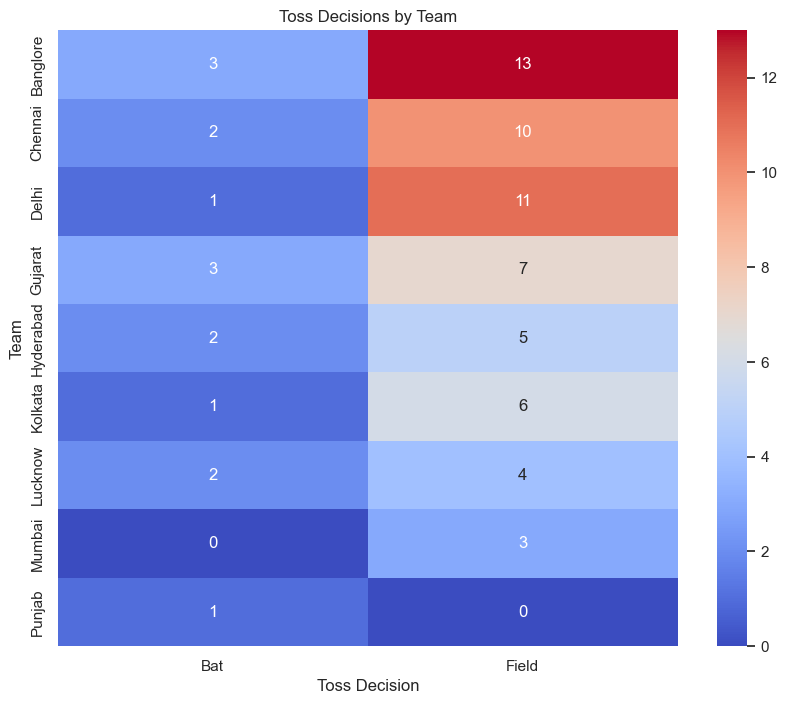

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Create a heatmap for toss decisions
heatmap_data = pd.crosstab(df['team1'], df['toss_decision'])

# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure and set the size
plt.figure(figsize=(10, 8))

# Create the heatmap using Seaborn
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='g')

# Set the title and labels
plt.title('Toss Decisions by Team')
plt.xlabel('Toss Decision')
plt.ylabel('Team')

# Show the plot
plt.show()


In [ ]:
#Objectives
#The objective of this plot is to provide a visual summary of how IPL teams made toss decisions (whether to bat or field) during the IPL 2022 season.
#It allows us to quickly identify patterns and tendencies in the strategic choices made by each team. 
#For example, the heatmap can reveal whether certain teams consistently preferred batting or fielding and provide insights into the overall distribution of toss decisions across the participating teams.
#Managers and analysts can use this visualization to understand the strategic inclinations of different teams during toss moments.

#Interpretation
#The heatmap effectively conveys the distribution of toss decisions across various teams, offering insights into their strategic preferences during matches. 
#Each row represents a different team, and the columns depict the two possible toss decisions: "Bat" and "Field" (or bowl). 
#The intensity of colors in the heatmap indicates the frequency of each decision for a particular team.
#We can interpret from the chart that all the teams have chosen to Field most of the time.
#Analyzing the heatmap, one can quickly identify patterns and tendencies in toss decisions. 
#Teams with a preference for batting would have a more intense color in the corresponding column, while teams favoring fielding would show higher intensity in the respective column.
#The annotation feature adds numerical values to each cell, providing the exact count of occurrences for a specific toss decision by a particular team. 
#This enhances the interpretability of the heatmap, allowing viewers to quantify the strategic choices made by each team.

#Managerial Implication
#The heatmap illustrating toss decisions by IPL teams offers significant managerial implications, aiding teams in refining their strategic approaches. 
#The dominance of the "Field" decision across all teams highlights a prevalent trend in IPL 2022, signaling a collective inclination toward chasing targets.
#For teams that consistently opt for batting after winning the toss, managers can assess the effectiveness of this strategy in different match scenarios. 
#If the team tends to face challenges while setting targets, strategists may consider adjustments in batting order, target selection, or player roles to optimize their run-scoring potential.
#Teams that frequently choose to field can leverage this information to enhance their bowling and fielding strategies.
#We can emphasize specialized training in bowling under varying conditions and refine fielding techniques to create pressure on opposing teams during their innings.

In [15]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame
# Drop rows with missing or incorrect date values
df = df.dropna(subset=['date'])
df = df[df['date'].notna()]

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert the timestamp to a string
df['date_str'] = df['date'].dt.strftime('%Y-%m-%d')

# Create an animated bar chart
figure = px.bar(df, x=df["top_scorer"], y=df["highscore"], color=df["highscore"],
                title="Top Scorer in IPL 2022",
                animation_frame=df['date_str'],  # Use the string column for animation
                labels={'highscore': 'High Score', 'top_scorer': 'Top Scorer', 'date_str': 'Date'})

# Show the animated bar chart
figure.show()


In [ ]:
#Objectives
#The objective of this animated bar chart is to provide a dynamic and visual representation of the high scores achieved by top scorers in IPL 2022.
#It allows us to track the performance of individual players over time, identifying trends, fluctuations, and exceptional performances on specific dates.
#This visualization is useful for showcasing the temporal aspect of player performances and can be valuable for fans, analysts, and team management to analyze and appreciate the contributions of top scorers throughout the IPL season.

#Interpretation
#The animated bar chart effectively captures the dynamic performance of top scorers in IPL 2022, offering valuable insights into their high scores throughout the tournament. 
#The x-axis represents the top scorers, while the y-axis signifies their respective high scores. 
#Each bar is color-coded based on the corresponding high score, providing a visual distinction and facilitating a quick understanding of the players' standout performances.
#We can see the chart starts with Andre Russel with score of 70 shows the date wise high scorer and ends with Ishan kishan with high score of 51 runs
#The animation, driven by the 'date_str' column, allows for a chronological exploration of how the top scorers' high scores evolve over the course of the tournament. 
#This temporal aspect enhances the analysis, enabling viewers to discern patterns, trends, or exceptional performances at specific points in time. 
#The visualization effectively communicates the dynamic nature of player performances, offering a compelling narrative of the IPL 2022 season.
#The chart helps us to see the date wise high scorrer

#Managerial Implications
#The visualization enables teams to identify consistent high performers and recognize players who demonstrate remarkable performances at specific stages of the tournament. 
#This insight aids in making informed decisions regarding team composition, batting order, and strategic planning for crucial matches.
#For team selectors, the chart provides a nuanced understanding of player dynamics over time.
#Observing the evolution of top scorers' high scores assists in evaluating player consistency, adaptability to varying match conditions, and the ability to deliver under pressure. Managers can use this information to fine-tune their selection strategies, ensuring that the team includes players with a demonstrated capacity for high-impact performances.

In [16]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Calculate the total wickets for each team after each match
df['total_wickets_team1'] = df.groupby('team1')['second_ings_wkts'].cumsum()
df['total_wickets_team2'] = df.groupby('team2')['first_ings_wkts'].cumsum()

# Concatenate data for both teams for plotting
total_wickets_data = pd.concat([df[['date', 'team1', 'total_wickets_team1']].rename(columns={'team1': 'team', 'total_wickets_team1': 'total_wickets'}),
                                df[['date', 'team2', 'total_wickets_team2']].rename(columns={'team2': 'team', 'total_wickets_team2': 'total_wickets'})])

# Create a horizontal bar graph
fig = px.bar(total_wickets_data, x='total_wickets', y='team', color='team',
             title='Total Wickets of Teams After Each Match',
             labels={'total_wickets': 'Total Wickets', 'team': 'Team'},
             orientation='h')

# Update layout for better readability
fig.update_layout(yaxis=dict(categoryorder='total ascending'))

# Show the plot
fig.show()


In [ ]:
#Objectives
#The objective of this plot is to provide a clear and visual representation of the cumulative total wickets taken by each IPL team after each match.
#It allows us to compare the bowling performance of different teams over the course of the tournament, identifying which teams have consistently taken more wickets and how their performances have evolved.
#This visualization can be valuable for assessing the effectiveness of teams' bowling strategies and understanding their overall competitiveness in the IPL.

#Interpretation
#The graph allows for a quick visual comparison of the bowling performance of different teams.
#The horizontal bars represent each IPL team.
#The length of each bar indicates the cumulative total of wickets taken by that particular team across all matches.
#Teams with longer bars have collectively taken more wickets, showcasing their effectiveness in dismissing opposing players.
#The y-axis lists the names of the IPL teams, providing clear identification of each bar's corresponding team.
#We can interpret from the chart that highest number of wickets are taken by Banglore followed by Rajasthan and Punjab.

#Managerial Implication
#The chart provides a comprehensive overview of each team's cumulative wickets, allowing managers to assess the overall strength of their bowling squads. 
#Teams with higher cumulative wickets demonstrate greater effectiveness in dismissing opponents, reflecting a strong bowling unit.
#Managers can identify trends in bowling performance over time by analyzing the fluctuations in cumulative wickets.
#Understanding the cumulative wickets taken by each team helps in strategic planning for upcoming matches.
#The chart aids in evaluating individual bowlers' contributions to the team's cumulative wickets. Managers can identify key bowlers making significant impacts and consider their roles in future match strategies. 

In [17]:
figure = px.bar(df, x =df["best_bowling"], title="best bowling in ipl 2022")
figure.show()

In [ ]:
#Objectives
#The objective of this plot is to allow us to easily compare and identify the best bowling performances in the IPL 2022. 
#The chart provides a visual representation of the players who achieved notable milestones in terms of their bowling figures, showcasing the effectiveness of their bowling performances during specific matches.
#This visualization is valuable for highlighting outstanding individual contributions in the bowling department throughout the tournament. 

#Interpretation
#Each bar in the chart represents a specific best bowling performance by a player in the IPL 2022.
#The x-axis likely represents the best bowling figures achieved by players, possibly in terms of the number of wickets taken or other relevant metrics.
#The height of each bar corresponds to the magnitude of the best bowling performance, indicating the effectiveness of a player's bowling during a particular match.
#We can interpret from the chart that the best bowling in the league is from Yuzvendra chahal.

#Managerial Implications
#We can utilize the chart to assess and compare the best bowling performances of players.
#Identifying standout performances, such as Yuzvendra Chahal's in this case, allows teams to recognize key contributors to the bowling department.
#The chart aids in understanding which players have delivered the most impactful bowling performances. 
#Teams can strategically deploy these players in crucial match situations, maximizing their effectiveness and contributing to overall team success.
#Recognizing the best bowling figures helps teams formulate strategies tailored to specific opponents.
#We can devise game plans that leverage the strengths of bowlers with notable performances against particular teams or batting lineups.

In [18]:
# install bubbly for plotting bubble plots
!pip install bubbly
# import basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
import bubbly
from bubbly.bubbly import bubbleplot

In [ ]:
#Acknoledgement
#ChatGPT